## Ice Cream Revenue Prediction using Simple Linear Regression Model

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [2]:
df = pd.read_csv('Dataset/IceCreamData.csv')

### Data Exploration

In [3]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
df.info() #to check for missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


### Data Visualization

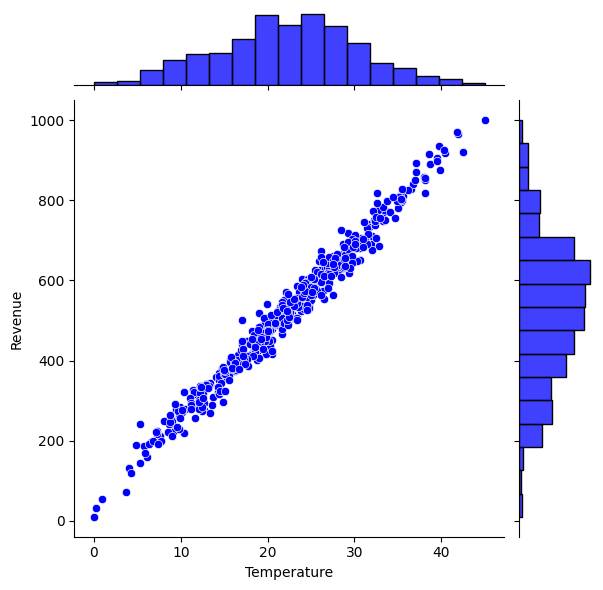

In [7]:
sns.jointplot(x='Temperature', y='Revenue', data=df, color = 'blue')

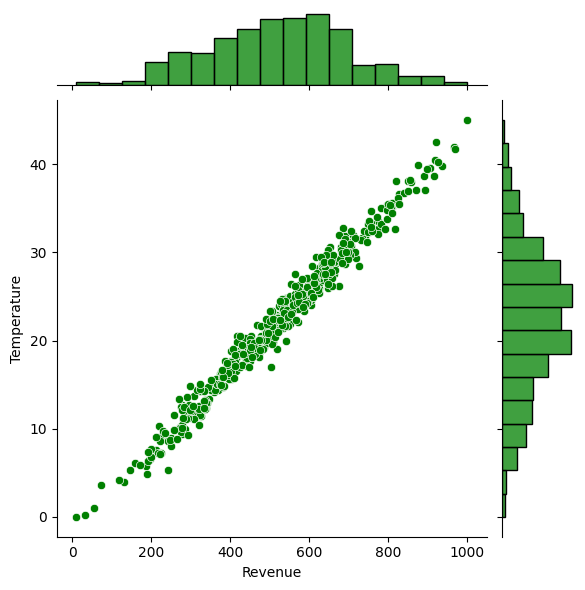

In [8]:
sns.jointplot(x='Revenue', y='Temperature', data=df, color = 'green')

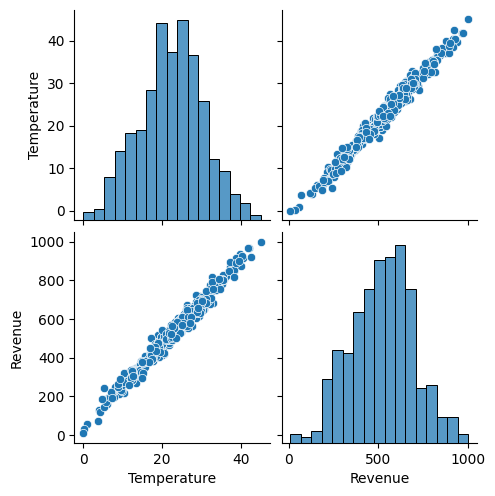

In [9]:
sns.pairplot(df)

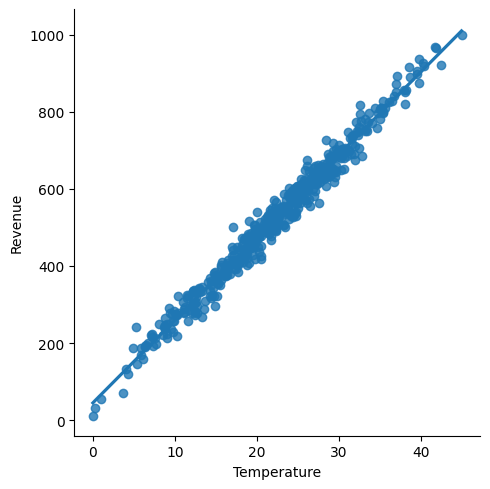

In [10]:
sns.lmplot(data = df, x='Temperature', y='Revenue')

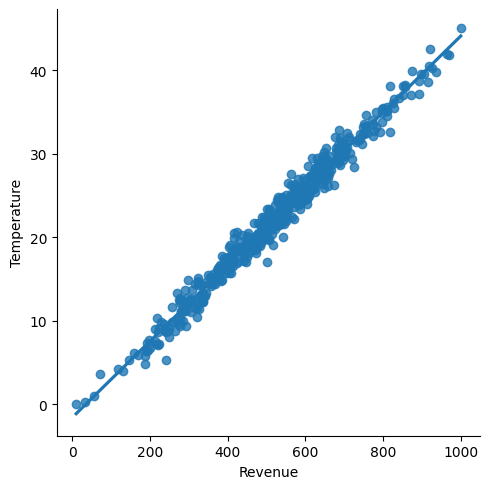

In [11]:
sns.lmplot(data = df, x='Revenue', y='Temperature')

### Create Testing and Training Data

In [12]:
X = df[['Temperature']]

In [13]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [14]:
y = df['Revenue']

In [15]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

In [18]:
X_train

,Temperature
227,26.944123
417,27.516646
203,10.447126
126,15.992347
329,41.924446
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [19]:
X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
220,24.802577
176,21.322392
320,15.118197
153,19.754708


In [20]:
X_train.shape

(375, 1)

In [21]:
X_test.shape

(125, 1)

In [22]:
y_train.shape

(375,)

In [23]:
y_test.shape

(125,)

### Train the Model

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [21.37416109]
Linear Model Coefficient (b) 46.91078475053047


### Test the Model

In [26]:
y_predict = regressor.predict(X_test)

In [27]:
y_predict

array([681.81277787, 632.03701584, 559.56236196, 498.84704992,
       615.35775421, 304.73607431, 285.81302849, 315.61634521,
       506.20253292, 685.57013845, 723.81902231, 400.82303176,
       431.58187843, 671.24393513,  52.61827778, 198.8274425 ,
       523.01806979, 563.82215553, 583.74570895, 682.11913736,
       556.14851344, 783.72448213, 655.32484725, 569.988492  ,
       912.00834943, 664.6281381 , 315.97207922, 630.90251298,
       730.97303461, 697.89804173, 435.04880926, 471.17165448,
       710.15811647, 799.64974714, 640.91056016, 493.60331223,
       744.77578087, 318.11532407, 262.71809247, 132.11937313,
       582.46776731, 230.44959759, 547.2212659 , 392.9861862 ,
       436.63073379, 592.93436718, 572.00732982, 125.24002263,
       474.74420892, 530.37968312, 623.08805407, 503.42063264,
       484.54721484, 498.52811922, 551.14921878, 630.69921564,
       573.04086113, 679.3611088 , 171.35825421, 660.37649129,
       583.66012275, 704.43854379, 535.74986137, 630.02

In [28]:
y_test

361    659.873287
73     623.248701
374    559.135869
155    497.752318
104    627.901841
          ...    
220    563.301280
176    520.470310
320    374.955702
153    493.710333
231    449.112869
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Training Set)')

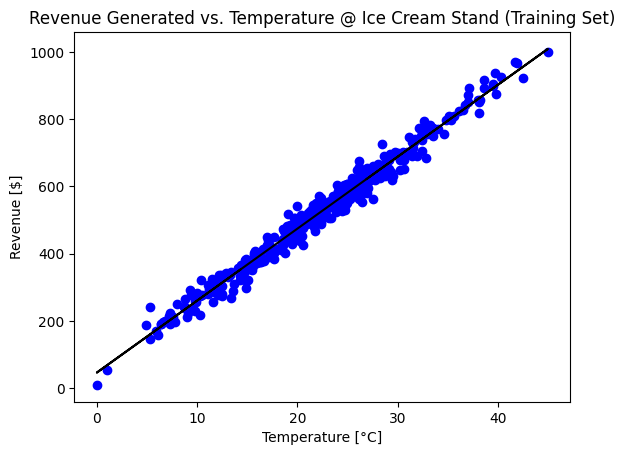

In [29]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [°C]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Training Set)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @ Ice Cream Stand (Testing Set)')

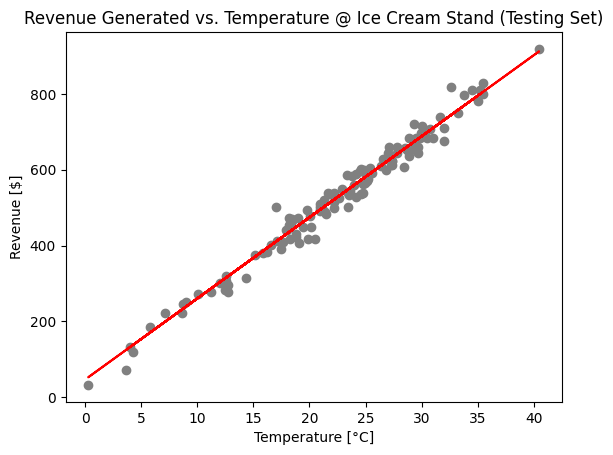

In [30]:
plt.scatter(X_test, y_test, color='grey')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [°C]')
plt.title('Revenue Generated vs. Temperature @ Ice Cream Stand (Testing Set)')

## Make Prediction

In [32]:
T = [[20]]
revenue = regressor.predict(T)
revenue

c:\Users\pmadh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([474.39400655])